# El conjunto Sign Language Numbers

El conjunto MNIST es un dataset pequeño, por lo que nos cabian en memoria sin níngun problema. Lo normal es trabajar con imágenes mucho mayores, por lo que no podemos tener el dataset completo en memoria, tenemos que ir procesándolo poco a poco.

Para ello, *Keras* nos proporciona la clase `ImageDataGenerator`. Permite crear, en tiempo de ejecución, batches de entrenamiento y de validación y procesar las imágenes para adaptarlas al tamaño y formato de la red.

Requisito: Tener todas las imágenes en una misma carpeta. Dentro tantas carpetas como clases y que tengan sólo imágenes de la misma clase.

In [10]:
# Importar imageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Vamos a crear una instancia de la clase ImageDataGeneratos. Por ahora, vamos a ver el parámetro `rescale`. Tenemos imágenes en 3 canales, RGB. Cada canal tiene un valor por defecto de tipo entero, en un rango de 0 a 255. Lo primero, vamos a reescalar a un rango flotante entre 0 y 1.

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)

Una vez tenemos la clase instanciada en el objeto `train_datagen`, usamos el método `flow_from_directory`. Aquí debemos especificar la carpeta donde están las imágenes, el tamaño que deben tener todas, el tamaño de lote (batch) y el tipo de clasificación (binaria o categórica).

In [12]:
train_generator = train_datagen.flow_from_directory(
        "/content/drive/MyDrive/Colab Notebooks/PIA/Redes Neuronales/images",
        target_size=(100, 100),
        batch_size=20,
        class_mode='categorical')

Found 2062 images belonging to 10 classes.


Cuando el dataset cabe en la RAM: `fit()`
Cuando el dataset no cabe en la RAM: `fit_generator()`

NOTA: `fit_generator()` está deprecado, pronto desaraperecerá de Keras. si usamos ImageDataGenerator y el método fit, Keras decidirá si el modelo es tan grande que debe usar GPU o no, y si cabe en RAM o debe procesarlo poco a poco

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from time import time
import keras

In [14]:
# Creación de CNN

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
        activation='relu',
        input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3),
        activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,354,378 (16.61 MB)

 Trainable params: 4,354,378 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
epochs = 20

model.fit(
    train_generator,
    epochs=epochs
)

Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 642s 6s/step - accuracy: 0.1572 - loss: 2.6278
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5517 - loss: 1.3140
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.6896 - loss: 0.8853
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.7624 - loss: 0.7129
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7585 - loss: 0.6743
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8157 - loss: 0.5658
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - accuracy: 0.8300 - loss: 0.4782
Epoch 8/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8328 - loss: 0.4410
Epoch 9/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.8568 - loss: 0.3885
Epoch 10/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8809 - loss: 0.3279
Epoch 11/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.8684 - loss: 0.3302
Epoch 12/20
104/104 ━━━━━━━━━━━━━━━━━━━━

# Data augmentation

Consiste en generar nuevas imágenes aplicando ligeras transformaciones en los datos ya existentens. De esta forma, podemos conseguir imágenes nuevas ampliando, roatando, cambiando el brillo, alejando o acercando, etc. La clase ImageDataGenerator proporciona una gran cantidad de opciones de configuración: [documentación](https://keras.io/api/data_loading/image/)

# Conjunto de validación

La clase ImageDataGenerator proporciona un parámetro que se llama `validation_split`. Si le damos un valor obtenermos automáticamente un conjunto de validación.

Una vez tenemos nuestro conjunto de validación separado, tenemos que crear una nueva instancia de `ImageDataGenerator` para procesar las imágenes de validación y alimentar al modelo.

# Early Stopping

# Guardando el modelo

Es posible guardar sólo los pesos, sólo la arquitectura, o los pesos y la arquitectura juntos.

# Guardar y cargar los pesos

Para guardar los pesos el método más usado es `save_weitghts`. Para cargarlos usamos `load_weitghts`.

# Guardar y cargar sólo la arquitectura

Para guardar y cargar sólo la arquitectura: `model.to_json()` y `model.from_json()`.

# Guardar y cargar el modelo

Hay múltiples métodos y que lo más habitual es usar `save_model` y `load_model`. Esto guarda pesos + arqutectura.

# Mejorando el entrenamiento

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [18]:
# Data source
batch_size = 20

train_data_dir = '/content/drive/MyDrive/Colab Notebooks/PIA/Redes Neuronales/images'
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/PIA/Redes Neuronales/images'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    zoom_range = 0.1
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100,100),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    train_data_dir,
    target_size=(100,100),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 2062 images belonging to 10 classes.
Found 2062 images belonging to 10 classes.


In [19]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3),
        activation='relu',
        input_shape=(100, 100, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, kernel_size=(3,3),
        activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       4,333,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,354,378 (16.61 MB)

 Trainable params: 4,354,378 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Entrenamiento 2
epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)
model2.fit(
    train_generator,
    epochs=epochs,
    validation_data = validation_generator,
    callbacks = [es]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 25s 204ms/step - accuracy: 0.1869 - loss: 2.3525 - val_accuracy: 0.6853 - val_loss: 1.1930
Epoch 2/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 217ms/step - accuracy: 0.4934 - loss: 1.4386 - val_accuracy: 0.7881 - val_loss: 0.7315
Epoch 3/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.6165 - loss: 1.1296 - val_accuracy: 0.8152 - val_loss: 0.6469
Epoch 4/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.6468 - loss: 1.0108 - val_accuracy: 0.8322 - val_loss: 0.5715
Epoch 5/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.6824 - loss: 0.9135 - val_accuracy: 0.8695 - val_loss: 0.4545
Epoch 6/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.7220 - loss: 0.8196 - val_accuracy: 0.8739 - val_loss: 0.4803
Epoch 7/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 18s 177ms/step - accuracy: 0.7330 - loss: 0.7947 - val_accuracy: 0.8991 - val_loss: 0.3511
Epoch 8/200
104/104 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.7613 -

In [26]:
# Guardar

model2.save("/content/drive/MyDrive/Colab Notebooks/PIA/Redes Neuronales/models/mimodelo.h5")

(100, 100, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

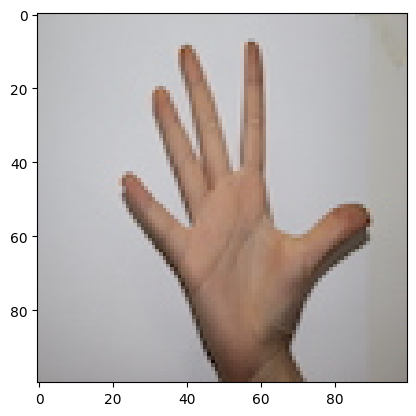

In [25]:
# Producción

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

load_model = keras.models.load_model("mimodelo.h5")
# Renderiza la imagen dentro del cuaderno
%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/Colab Notebooks/PIA/Redes Neuronales/images/5/IMG_1123.JPG', 'r')
im = np.asarray(pil_im.resize((100,100)))
imshow(im)
print(im.shape)
# Hacemos la predicción. Como es una imagen sólo añadimos un 1 al principio
im = im.reshape(1,100,100,3)
load_model.predict(im)
